In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#import pymc3 as pm

from matplotlib import animation, rc
%matplotlib inline


In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('Correlation2015.csv')

In [5]:
df.columns

Index(['4', 'X', 'Y', 'S3 OLCI Chl-a', 'L8 Chl-a Estimates'], dtype='object')

In [6]:
df.head()

,4,X,Y,S3 OLCI Chl-a,L8 Chl-a Estimates
0,7/1/2015,34.6883,-0.13600,25.826229,28.672397
1,NaN,34.8431,-0.28705,32.192482,27.782982
2,NaN,34.6333,-0.33787,20.771219,11.716781
3,NaN,34.1963,-0.32962,27.068468,22.068468
4,NaN,34.4450,-0.51776,30.188889,24.798715


In [6]:
data=df[['AGE',	'RESIDENCE',	'RELIGION',	'BoD',	'CURRWORK',	'WEALTHQUANTILE',	'EDUCLVL',	'MEDIANEWS',	'MEDIARADIO',	'ANCCARE']]

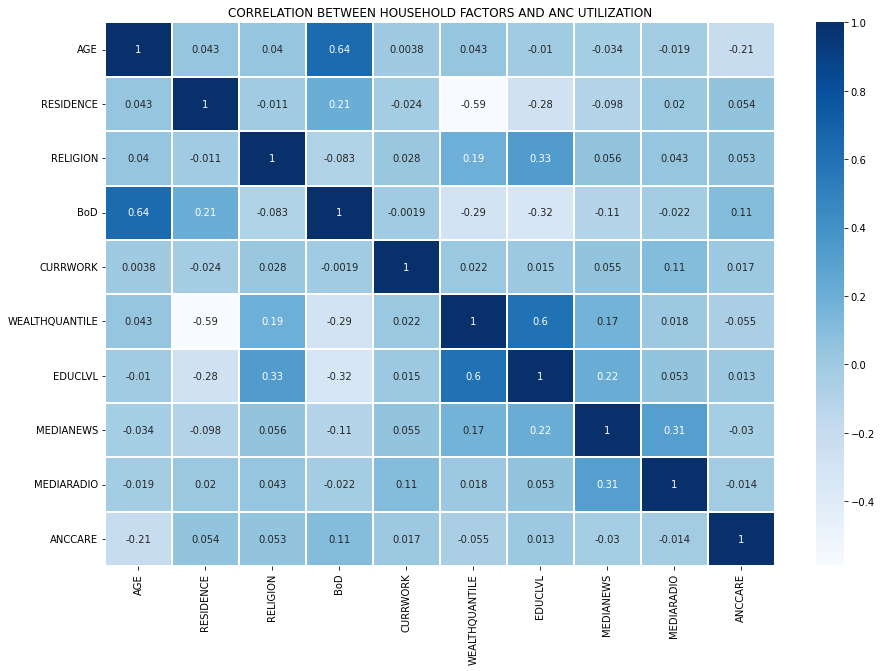

In [7]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(), annot=True, linewidth=1.0, cmap='Blues')
plt.title('CORRELATION BETWEEN HOUSEHOLD FACTORS AND ANC UTILIZATION')
plt.savefig('/content/drive/MyDrive/data/Correlation.png',dpi=1000, bbox_inches='tight')
plt.show()

In [8]:
mask1= df["DHSYEAR"] == 2014
data14=df[mask1]

In [9]:
data14.head()

,DHSYEAR,LATNUM,LONGNUM,YEAR,AGE,RESIDENCE,RELIGION,BoD,CURRWORK,WEALTHQUANTILE,EDUCLVL,MEDIANEWS,MEDIARADIO,ANCCARE
0,2014,-1.282723,36.752958,2014,27,1,3,2,1,0.89121,2,1,0,0
1,2014,-1.278781,36.758441,2014,33,1,3,3,1,0.33347,1,1,0,1
2,2014,-1.279646,36.745931,2014,26,1,3,0,0,0.49127,2,2,0,0
3,2014,-1.280380,36.697090,2014,46,1,3,3,0,0.90746,1,1,0,0
4,2014,-1.272064,36.743127,2014,29,1,2,3,1,0.20000,2,1,0,1


In [10]:
test_data = data14[['DHSYEAR','LATNUM',	'LONGNUM',	'AGE', 'RESIDENCE', 'RELIGION',	'BoD',	'CURRWORK',	'WEALTHQUANTILE',	'EDUCLVL',	'MEDIANEWS',	'MEDIARADIO','ANCCARE']]
y_test = test_data[['ANCCARE']]

In [11]:
mask2= df["DHSYEAR"] <2014
data03_08=df[mask2]

In [12]:
train_data = data03_08[['DHSYEAR','AGE', 'RESIDENCE', 'RELIGION',	'BoD',	'CURRWORK',	'WEALTHQUANTILE',	'EDUCLVL',	'MEDIANEWS',	'MEDIARADIO','ANCCARE']]
y_train = train_data[['ANCCARE']]

In [13]:

train_data.head()

,DHSYEAR,AGE,RESIDENCE,RELIGION,BoD,CURRWORK,WEALTHQUANTILE,EDUCLVL,MEDIANEWS,MEDIARADIO,ANCCARE
1593,2008,25,2,3,0,1,-0.95132,1,1,11,0
1594,2008,39,2,2,4,1,2.23772,3,12,12,1
1595,2008,40,2,2,8,0,-0.75747,1,1,12,1
1596,2008,24,2,1,2,0,-1.23106,0,1,1,0
1597,2008,45,2,3,3,1,1.19489,2,1,12,0


In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
sss= StandardScaler()

In [16]:
X_train = sss.fit_transform(train_data[['AGE', 'RESIDENCE', 'RELIGION',	'BoD',	'CURRWORK',	'WEALTHQUANTILE',	'EDUCLVL',	'MEDIANEWS',	'MEDIARADIO']])

In [17]:
X_train

array([[-0.70195299,  0.69716104,  0.68981722, ..., -0.28337873,
        -0.48082896,  0.27510881],
       [ 0.85527871,  0.69716104, -0.49145776, ...,  2.08453991,
         1.56607531,  0.43036824],
       [ 0.96650954,  0.69716104, -0.49145776, ..., -0.28337873,
        -0.48082896,  0.43036824],
       ...,
       [-0.81318383, -1.43438881, -1.67273275, ..., -0.28337873,
         1.37999311,  0.27510881],
       [ 1.52266372,  0.69716104, -0.49145776, ..., -1.46733806,
        -0.48082896, -1.27748548],
       [-0.25702965, -1.43438881,  0.68981722, ...,  2.08453991,
         1.56607531,  0.43036824]])

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
logit_B1 = LogisticRegression()

In [20]:
logit_B1.fit(X_train, y_train.values.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [21]:
logit_B1.coef_

array([[-1.43851956,  0.3111608 ,  0.18751715,  1.28588871,  0.72050777,
         0.31413783,  0.29771944, -0.07114722,  0.06805554]])

In [22]:
test_data

,DHSYEAR,LATNUM,LONGNUM,AGE,RESIDENCE,RELIGION,BoD,CURRWORK,WEALTHQUANTILE,EDUCLVL,MEDIANEWS,MEDIARADIO,ANCCARE
0,2014,-1.282723,36.752958,27,1,3,2,1,0.89121,2,1,0,0
1,2014,-1.278781,36.758441,33,1,3,3,1,0.33347,1,1,0,1
2,2014,-1.279646,36.745931,26,1,3,0,0,0.49127,2,2,0,0
3,2014,-1.280380,36.697090,46,1,3,3,0,0.90746,1,1,0,0
4,2014,-1.272064,36.743127,29,1,2,3,1,0.20000,2,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1588,2014,0.577623,34.261595,39,2,2,4,0,0.87569,2,1,0,0
1589,2014,0.560891,34.248927,29,2,3,3,0,-0.59573,1,1,0,1
1590,2014,0.500992,34.174886,42,2,2,5,0,-0.74173,1,2,1,0
1591,2014,0.456166,34.122642,38,1,3,3,0,1.15530,1,1,0,1


In [23]:
data_test = sss.fit_transform(test_data[['AGE',	'RESIDENCE',	'RELIGION',	'BoD',	'CURRWORK',	'WEALTHQUANTILE',	'EDUCLVL',	'MEDIANEWS',	'MEDIARADIO']])

In [24]:
data14_pred= logit_B1.predict(data_test)

In [25]:
from sklearn.metrics import classification_report

In [26]:
print(classification_report(y_test, data14_pred))

              precision    recall  f1-score   support

           0       0.61      0.67      0.64       755
           1       0.67      0.61      0.64       838

    accuracy                           0.64      1593
   macro avg       0.64      0.64      0.64      1593
weighted avg       0.64      0.64      0.64      1593



In [27]:
df['ANCCARE'].unique()

array([0, 1])

In [28]:
from sklearn.ensemble import RandomForestClassifier 

In [29]:
RF_class = RandomForestClassifier(n_estimators=1000)

In [30]:
RF_class.fit(X_train, y_train.values.ravel())

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [31]:
from sklearn.metrics import classification_report, accuracy_score

In [32]:
RF_pred = RF_class.predict(data_test)

In [33]:
accuracy_score(y_test, RF_pred )

0.7627118644067796

In [34]:
print(classification_report(y_test, RF_pred))

              precision    recall  f1-score   support

           0       0.79      0.69      0.73       755
           1       0.75      0.83      0.79       838

    accuracy                           0.76      1593
   macro avg       0.77      0.76      0.76      1593
weighted avg       0.77      0.76      0.76      1593



In [35]:
test_data.loc[:, "PRED_ANCCARE_RF"] = RF_pred
test_data.loc[:, "PRED_ANCCARE_LR"] = data14_pred

In [36]:
test_data

,DHSYEAR,LATNUM,LONGNUM,AGE,RESIDENCE,RELIGION,BoD,CURRWORK,WEALTHQUANTILE,EDUCLVL,MEDIANEWS,MEDIARADIO,ANCCARE,PRED_ANCCARE_RF,PRED_ANCCARE_LR
0,2014,-1.282723,36.752958,27,1,3,2,1,0.89121,2,1,0,0,1,1
1,2014,-1.278781,36.758441,33,1,3,3,1,0.33347,1,1,0,1,0,1
2,2014,-1.279646,36.745931,26,1,3,0,0,0.49127,2,2,0,0,0,0
3,2014,-1.280380,36.697090,46,1,3,3,0,0.90746,1,1,0,0,0,0
4,2014,-1.272064,36.743127,29,1,2,3,1,0.20000,2,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1588,2014,0.577623,34.261595,39,2,2,4,0,0.87569,2,1,0,0,0,0
1589,2014,0.560891,34.248927,29,2,3,3,0,-0.59573,1,1,0,1,1,0
1590,2014,0.500992,34.174886,42,2,2,5,0,-0.74173,1,2,1,0,0,0
1591,2014,0.456166,34.122642,38,1,3,3,0,1.15530,1,1,0,1,1,0


In [37]:
test_data.to_csv('/content/drive/MyDrive/data/PredictionLogistic.csv', index=False)